In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import joblib


In [2]:
# Load the dataset
df = pd.read_csv('Mental Health Dataset.csv')


In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [5]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [6]:
df.shape

(292364, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [8]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [9]:
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

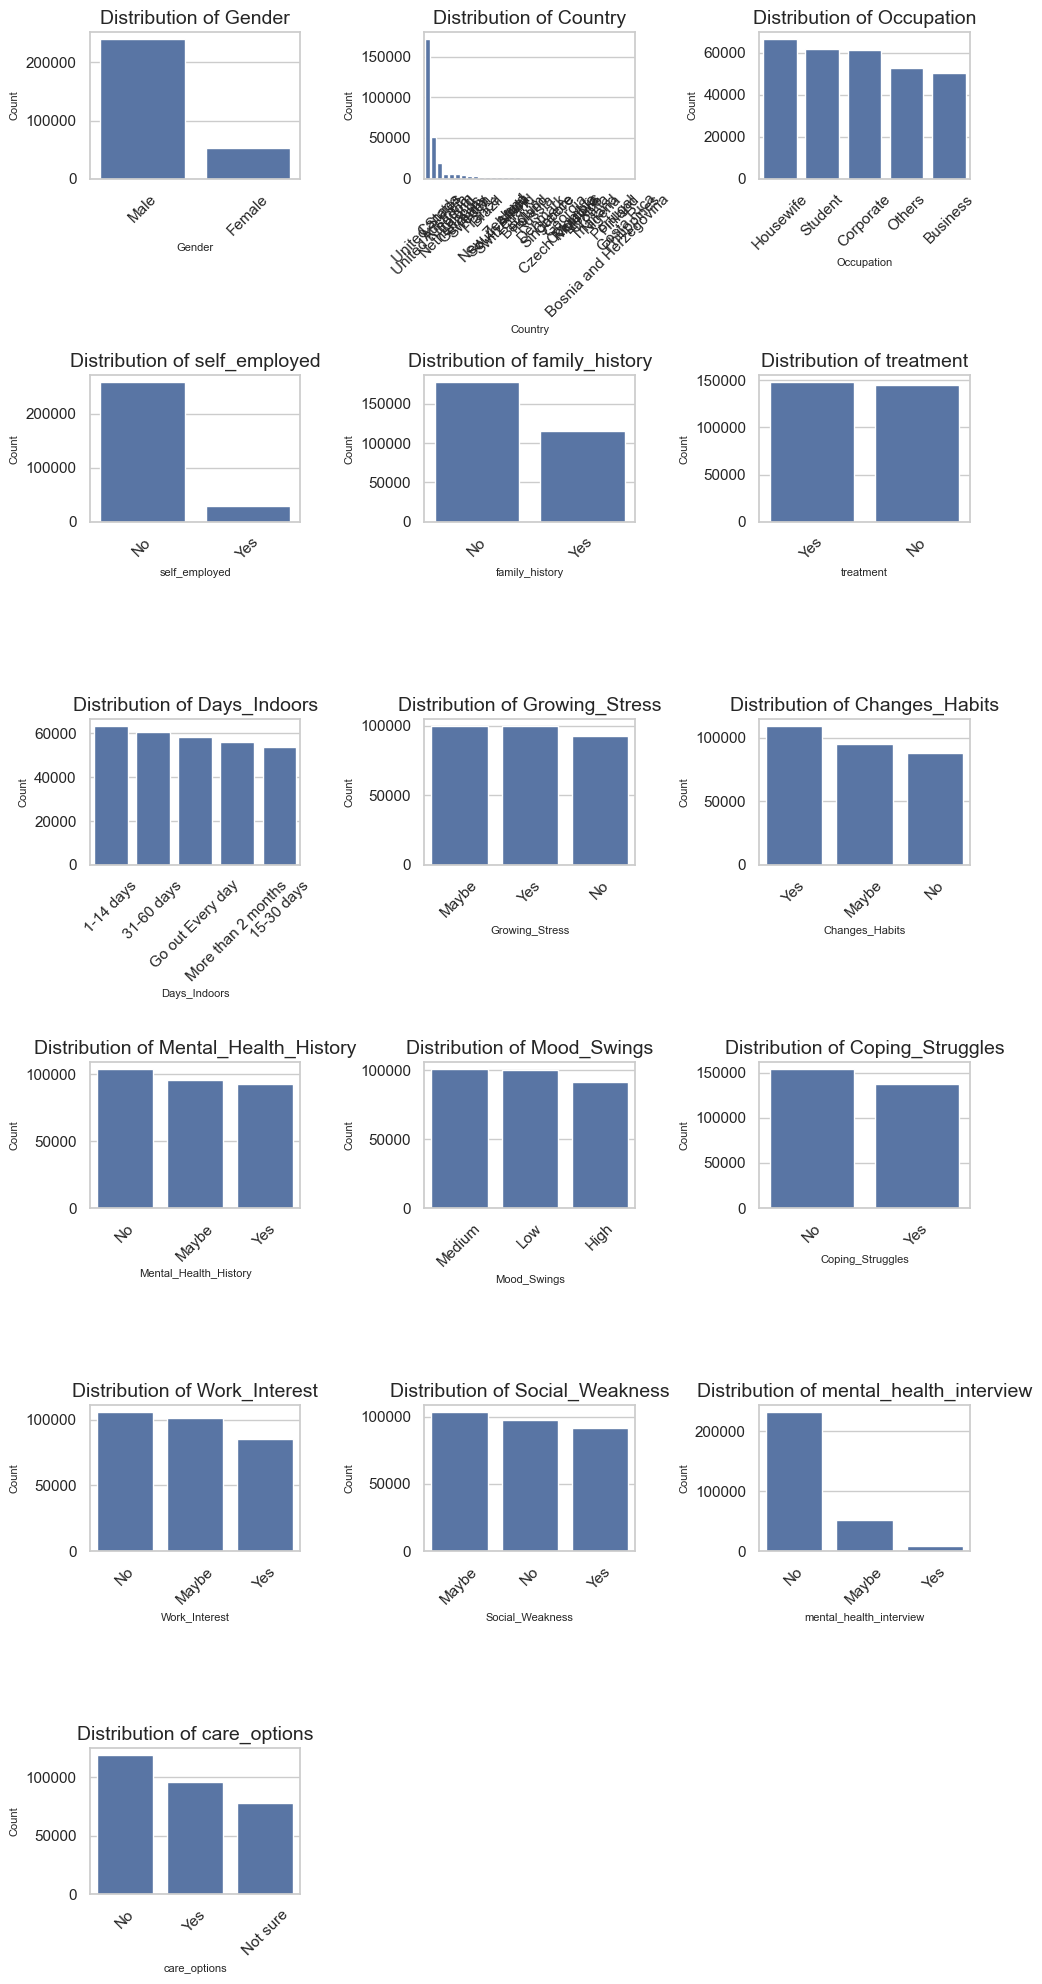

In [10]:
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = df.columns[1:]  # Exclude 'Timestamp'

# Number of rows and columns for subplots
num_columns = 3  # Number of plots per row
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.barplot(
        x=df[col].value_counts().index, 
        y=df[col].value_counts().values, 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
# Fill missing values
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [12]:
df = df.drop(columns=['Timestamp'])

In [13]:
df.columns

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [14]:
df.shape

(292364, 16)

In [15]:
# Create a new column for counting "Yes" responses
yes_columns = [
    'self_employed', 
    'family_history', 
    'Growing_Stress', 
    'Changes_Habits', 
    'Mental_Health_History', 
    'Coping_Struggles', 
    'Social_Weakness', 
    'mental_health_interview', 
    'care_options'
]
df['Yes_Count'] = df[yes_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)


In [16]:
for column in df.columns:
    print(f"Unique categories in '{column}':")
    print(df[column].unique())
    print()

Unique categories in 'Gender':
['Female' 'Male']

Unique categories in 'Country':
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']

Unique categories in 'Occupation':
['Corporate' 'Student' 'Business' 'Housewife' 'Others']

Unique categories in 'self_employed':
['No' 'Yes']

Unique categories in 'family_history':
['No' 'Yes']

Unique categories in 'treatment':
['Yes' 'No']

Unique categories in 'Days_Indoors':
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']

Unique categories in 'Growing_Stress':
['Yes' 'No' 'Maybe']

Unique categories in 'Changes_Habits':
['No' 'Yes' 'Maybe']

Unique categories in 

In [17]:
df.shape

(292364, 17)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            292364 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

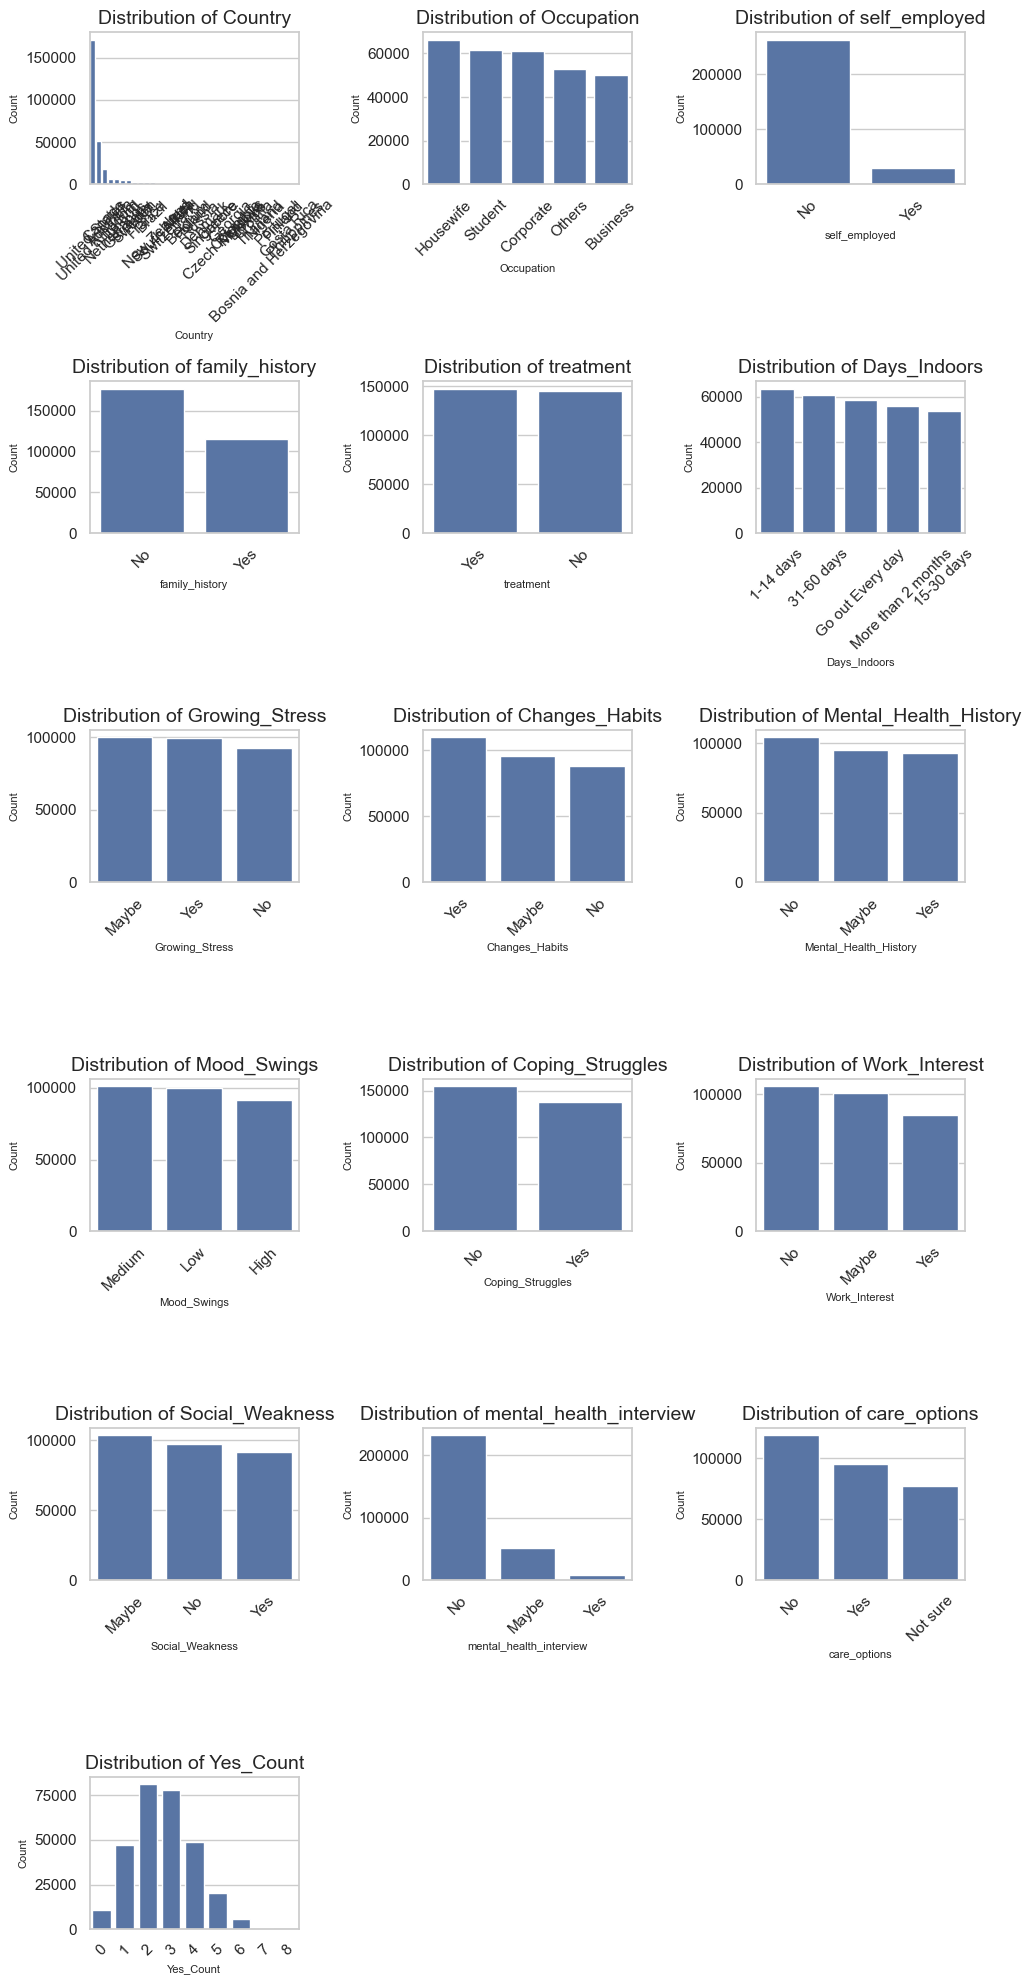

In [19]:
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = df.columns[1:]  # Exclude 'Timestamp'

# Number of rows and columns for subplots
num_columns = 3  # Number of plots per row
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.barplot(
        x=df[col].value_counts().index, 
        y=df[col].value_counts().values, 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [20]:
# Define features and target variable
X = df.drop(columns=['Yes_Count'])
y = df['Yes_Count']


In [21]:
# One-hot encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as they are
)

In [22]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Function to calculate and return metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1 score for the positive class (usually class 1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    return accuracy, precision, recall, f1_score


In [24]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]


In [25]:
# Create a Gradient Boosting model
model_gb = GradientBoostingClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_gb)])

# Fit the model
pipeline_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate metrics for Gradient Boosting
accuracy_gb, precision_gb, recall_gb, f1_score_gb = calculate_metrics(y_test, y_pred_gb)
table.add_row(["Gradient Boosting", f"{accuracy_gb*100:.4f}", f"{precision_gb:.4f}", f"{recall_gb:.4f}", f"{f1_score_gb:.4f}"])

# Print results
print(f"Accuracy: {accuracy_gb*100:.4f}")


Accuracy: 91.7107


In [26]:
# Create a Random Forest Classifier model
model = RandomForestClassifier()
# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model)])
# Fit the model
pipeline.fit(X_train, y_train)
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy, precision, recall, f1_score = calculate_metrics(y_test, y_pred)
table.add_row(["Random Forest", f"{accuracy*100:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"])

# Print results
print(f"Accuracy: {accuracy*100:.4f}")


Accuracy: 99.2509


In [27]:
# Create a Logistic Regression model
model2 = LogisticRegression(max_iter=1000)

# Create a pipeline that first transforms the data and then fits the model
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', model)])

# Fit the model
pipeline2.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline2.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_lr, precision_lr, recall_lr, f1_score_lr = calculate_metrics(y_test, y_pred)
table.add_row(["Logistic Regression", f"{accuracy_lr*100:.4f}", f"{precision_lr:.4f}", f"{recall_lr:.4f}", f"{f1_score_lr:.4f}"])

# Print results
print(f"Accuracy: {accuracy_lr*100:.4f}")


Accuracy: 99.1877


In [28]:
# Create a Decision Tree model
model_dt = DecisionTreeClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_dt)])

# Fit the model
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = pipeline_dt.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt, precision_dt, recall_dt, f1_score_dt = calculate_metrics(y_test, y_pred_dt)
table.add_row(["Decision Tree", f"{accuracy_dt*100:.4f}", f"{precision_dt:.4f}", f"{recall_dt:.4f}", f"{f1_score_dt:.4f}"])

# Print results
print(f"Accuracy: {accuracy_dt*100:.4f}")

Accuracy: 99.9966


In [29]:
# Create a LightGBM model
model_lgbm = lgb.LGBMClassifier()

# Create a pipeline that first transforms the data and then fits the model
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', model_lgbm)])

# Fit the model
pipeline_lgbm.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# Calculate metrics for LightGBM
accuracy_lgbm, precision_lgbm, recall_lgbm, f1_score_lgbm = calculate_metrics(y_test, y_pred_lgbm)
table.add_row(["LightGBM", f"{accuracy_lgbm*100:.4f}", f"{precision_lgbm:.4f}", f"{recall_lgbm:.4f}", f"{f1_score_lgbm:.4f}"])

# Print results
print(f"Accuracy: {accuracy_lgbm*100:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 233891, number of used features: 79
[LightGBM] [Info] Start training from score -3.313261
[LightGBM] [Info] Start training from score -1.829981
[LightGBM] [Info] Start training from score -1.284816
[LightGBM] [Info] Start training from score -1.318873
[LightGBM] [Info] Start training from score -1.792653
[LightGBM] [Info] Start training from score -2.659405
[LightGBM] [Info] Start training from score -3.955009
[LightGBM] [Info] Start training from score -5.761380
[LightGBM] [Info] Start training from score -8.355277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [30]:
# Create an XGBoost model
model_xgb = xgb.XGBClassifier(eval_metric='logloss')

# Create a pipeline that first transforms the data and then fits the model
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model_xgb)])

# Fit the model
pipeline_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = pipeline_xgb.predict(X_test)

# Calculate metrics for XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb = calculate_metrics(y_test, y_pred_xgb)
table.add_row(["XGBoost", f"{accuracy_xgb*100:.4f}", f"{precision_xgb:.4f}", f"{recall_xgb:.4f}", f"{f1_score_xgb:.4f}"])

# Print results
print(f"Accuracy: {accuracy_xgb*100:.4f}")

Accuracy: 99.9367


In [31]:
# Voting Classifier 1: Gradient Boosting, Random Forest, Logistic Regression
model_vc1 = VotingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('rf', RandomForestClassifier()), ('lr', LogisticRegression(max_iter=1000))], voting='soft')
pipeline_vc1 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc1)])
pipeline_vc1.fit(X_train, y_train)
y_pred_vc1 = pipeline_vc1.predict(X_test)
accuracy_vc1, precision_vc1, recall_vc1, f1_score_vc1 = calculate_metrics(y_test, y_pred_vc1)
table.add_row(["GB + RF + LR", f"{accuracy_vc1*100:.4f}", f"{precision_vc1:.4f}", f"{recall_vc1:.4f}", f"{f1_score_vc1:.4f}"])
print(f"GB + RF + LR Accuracy: {accuracy_vc1*100:.4f}")


GB + RF + LR Accuracy: 99.9504


In [32]:
# Voting Classifier 2: Gradient Boosting, Decision Tree
model_vc2 = VotingClassifier(estimators=[('gb', GradientBoostingClassifier()), ('dt', DecisionTreeClassifier())], voting='soft')
pipeline_vc2 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc2)])
pipeline_vc2.fit(X_train, y_train)
y_pred_vc2 = pipeline_vc2.predict(X_test)
accuracy_vc2, precision_vc2, recall_vc2, f1_score_vc2 = calculate_metrics(y_test, y_pred_vc2)
table.add_row(["GB + DT", f"{accuracy_vc2*100:.4f}", f"{precision_vc2:.4f}", f"{recall_vc2:.4f}", f"{f1_score_vc2:.4f}"])
print(f"GB + DT Accuracy: {accuracy_vc2*100:.4f}")


GB + DT Accuracy: 100.0000


In [33]:
# Voting Classifier 3: Random Forest, LightGBM
model_vc3 = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('lgb', lgb.LGBMClassifier())], voting='soft')
pipeline_vc3 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc3)])
pipeline_vc3.fit(X_train, y_train)
y_pred_vc3 = pipeline_vc3.predict(X_test)
accuracy_vc3, precision_vc3, recall_vc3, f1_score_vc3 = calculate_metrics(y_test, y_pred_vc3)
table.add_row(["RF + LGB", f"{accuracy_vc3*100:.4f}", f"{precision_vc3:.4f}", f"{recall_vc3:.4f}", f"{f1_score_vc3:.4f}"])
print(f"RF + LGB Accuracy: {accuracy_vc3*100:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 233891, number of used features: 79
[LightGBM] [Info] Start training from score -3.313261
[LightGBM] [Info] Start training from score -1.829981
[LightGBM] [Info] Start training from score -1.284816
[LightGBM] [Info] Start training from score -1.318873
[LightGBM] [Info] Start training from score -1.792653
[LightGBM] [Info] Start training from score -2.659405
[LightGBM] [Info] Start training from score -3.955009
[LightGBM] [Info] Start training from score -5.761380
[LightGBM] [Info] Start training from score -8.355277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [34]:
# Voting Classifier 4: Decision Tree, XGBoost
model_vc4 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('xgb', xgb.XGBClassifier(eval_metric='logloss'))], voting='soft')
pipeline_vc4 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc4)])
pipeline_vc4.fit(X_train, y_train)
y_pred_vc4 = pipeline_vc4.predict(X_test)
accuracy_vc4, precision_vc4, recall_vc4, f1_score_vc4 = calculate_metrics(y_test, y_pred_vc4)
table.add_row(["DT + XGB", f"{accuracy_vc4*100:.4f}", f"{precision_vc4:.4f}", f"{recall_vc4:.4f}", f"{f1_score_vc4:.4f}"])
print(f"DT + XGB Accuracy: {accuracy_vc4*100:.4f}")


DT + XGB Accuracy: 99.9966


In [35]:
# Voting Classifier 5: Decision Tree, Logistic Regression, LightGBM
model_vc5 = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('lr', LogisticRegression(max_iter=1000)), ('lgb', lgb.LGBMClassifier())], voting='soft')
pipeline_vc5 = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_vc5)])
pipeline_vc5.fit(X_train, y_train)
y_pred_vc5 = pipeline_vc5.predict(X_test)
accuracy_vc5, precision_vc5, recall_vc5, f1_score_vc5 = calculate_metrics(y_test, y_pred_vc5)
table.add_row(["DT + LR + LGB", f"{accuracy_vc5*100:.4f}", f"{precision_vc5:.4f}", f"{recall_vc5:.4f}", f"{f1_score_vc5:.4f}"])
print(f"DT + LR + LGB Accuracy: {accuracy_vc5*100:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 233891, number of used features: 79
[LightGBM] [Info] Start training from score -3.313261
[LightGBM] [Info] Start training from score -1.829981
[LightGBM] [Info] Start training from score -1.284816
[LightGBM] [Info] Start training from score -1.318873
[LightGBM] [Info] Start training from score -1.792653
[LightGBM] [Info] Start training from score -2.659405
[LightGBM] [Info] Start training from score -3.955009
[LightGBM] [Info] Start training from score -5.761380
[LightGBM] [Info] Start training from score -8.355277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [36]:
print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
|  Gradient Boosting  | 91.7107  |   0.9725  | 0.9653 |  0.9689  |
|    Random Forest    | 99.2509  |   0.9984  | 1.0000 |  0.9992  |
| Logistic Regression | 99.1877  |   0.9984  | 1.0000 |  0.9992  |
|    Decision Tree    | 99.9966  |   1.0000  | 1.0000 |  1.0000  |
|       LightGBM      | 96.3487  |   0.9793  | 0.9934 |  0.9863  |
|       XGBoost       | 99.9367  |   1.0000  | 1.0000 |  1.0000  |
|     GB + RF + LR    | 99.9504  |   1.0000  | 1.0000 |  1.0000  |
|       GB + DT       | 100.0000 |   1.0000  | 1.0000 |  1.0000  |
|       RF + LGB      | 97.6280  |   0.9840  | 0.9978 |  0.9909  |
|       DT + XGB      | 99.9966  |   1.0000  | 1.0000 |  1.0000  |
|    DT + LR + LGB    | 99.9761  |   1.0000  | 1.0000 |  1.0000  |
+---------------------+----------+-----------+--------+-------

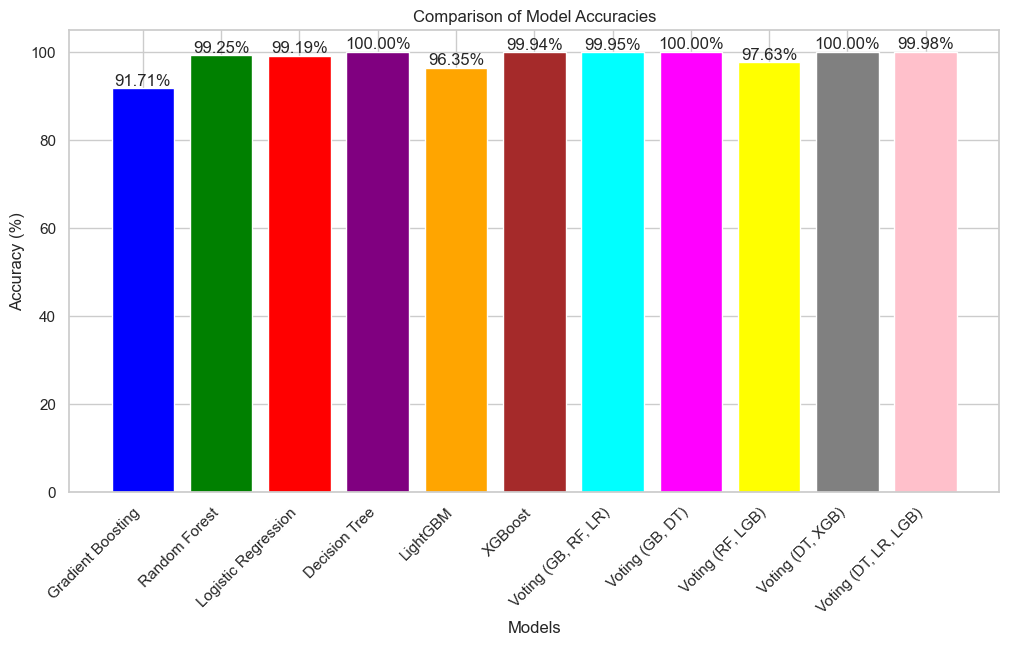

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy values
models = ["Gradient Boosting", "Random Forest", "Logistic Regression", "Decision Tree", "LightGBM", "XGBoost",
          "Voting (GB, RF, LR)", "Voting (GB, DT)", "Voting (RF, LGB)", "Voting (DT, XGB)", "Voting (DT, LR, LGB)"]
accuracies = [accuracy_gb, accuracy, accuracy_lr, accuracy_dt, accuracy_lgbm, accuracy_xgb,
              accuracy_vc1, accuracy_vc2, accuracy_vc3, accuracy_vc4, accuracy_vc5]

# Convert accuracies to percentage
accuracies = [acc * 100 for acc in accuracies]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow', 'gray', 'pink'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

# Set labels and title
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.title("Comparison of Model Accuracies")

# Show the plot
plt.show()


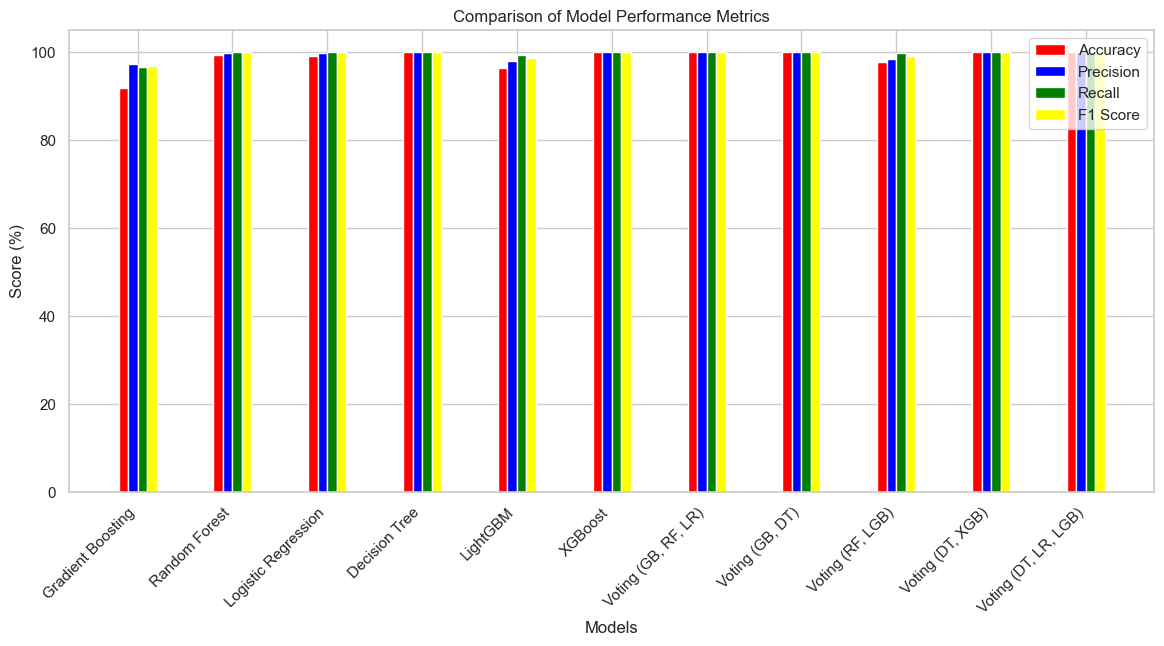

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Gradient Boosting", "Random Forest", "Logistic Regression", "Decision Tree", "LightGBM", "XGBoost",
          "Voting (GB, RF, LR)", "Voting (GB, DT)", "Voting (RF, LGB)", "Voting (DT, XGB)", "Voting (DT, LR, LGB)"]

# Metrics values for each model
accuracy_values = [accuracy_gb, accuracy, accuracy_lr, accuracy_dt, accuracy_lgbm, accuracy_xgb,
                   accuracy_vc1, accuracy_vc2, accuracy_vc3, accuracy_vc4, accuracy_vc5]

precision_values = [precision_gb, precision, precision_lr, precision_dt, precision_lgbm, precision_xgb,
                    precision_vc1, precision_vc2, precision_vc3, precision_vc4, precision_vc5]

recall_values = [recall_gb, recall, recall_lr, recall_dt, recall_lgbm, recall_xgb,
                 recall_vc1, recall_vc2, recall_vc3, recall_vc4, recall_vc5]

f1_values = [f1_score_gb, f1_score, f1_score_lr, f1_score_dt, f1_score_lgbm, f1_score_xgb,
             f1_score_vc1, f1_score_vc2, f1_score_vc3, f1_score_vc4, f1_score_vc5]

# Convert values to percentages where applicable
accuracy_values = [val * 100 for val in accuracy_values]
precision_values = [val * 100 for val in precision_values]
recall_values = [val * 100 for val in recall_values]
f1_values = [val * 100 for val in f1_values]

# Set figure size
plt.figure(figsize=(14, 6))

# Bar width and positions
bar_width = 0.1
index = np.arange(len(models))

# Plot bars
plt.bar(index, accuracy_values, bar_width, label='Accuracy', color='red')
plt.bar(index + bar_width, precision_values, bar_width, label='Precision', color='blue')
plt.bar(index + 2 * bar_width, recall_values, bar_width, label='Recall', color='green')
plt.bar(index + 3 * bar_width, f1_values, bar_width, label='F1 Score', color='yellow')

# Rotate x-axis labels for better readability
plt.xticks(index + bar_width * 1.5, models, rotation=45, ha='right')

# Set labels and title
plt.ylabel("Score (%)")
plt.xlabel("Models")
plt.title("Comparison of Model Performance Metrics")

# Add legend
plt.legend()

# Show plot
plt.show()


In [44]:
# Save the Random Forest model
joblib.dump(pipeline_vc2, 'voting_gb_dt_model.pkl')

['voting_gb_dt_model.pkl']